In [66]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [80]:
#делаю все необходимые импорты
import time as time

import numpy as np
from scipy.ndimage import gaussian_filter

import matplotlib.pyplot as plt

import skimage
from skimage.data import coins
from skimage.transform import rescale

from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering
from sklearn.utils.fixes import parse_version

# these were introduced in skimage-0.14
if parse_version(skimage.__version__) >= parse_version('0.14'):
    rescale_params = {'anti_aliasing': False, 'multichannel': False}
else:
    rescale_params = {}
    
import cv2
    
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

from matplotlib import image
from matplotlib import pyplot as plt

import numpy as np
import matplotlib.image as image
from scipy.ndimage import gaussian_filter
from skimage.transform import resize

In [81]:
#функция для загрузки изображения по названию
def load_image(name, output=False):
    img = cv2.imread(path+'/'+name+'.png')

    img = cv2.normalize(img, None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    return img

In [82]:
#проверяю что все загрузилось
img = image.imread("1_Left_4.png")

if img is None:
    print("Не удалось загрузить изображение.")
else:
    print("Изображение успешно загружено.")

Изображение успешно загружено.


In [83]:
img

array([[0.35686275, 0.36078432, 0.3647059 , ..., 0.36078432, 0.35686275,
        0.35686275],
       [0.35686275, 0.36078432, 0.36862746, ..., 0.36862746, 0.36078432,
        0.35686275],
       [0.36078432, 0.3647059 , 0.37254903, ..., 0.3764706 , 0.3647059 ,
        0.36078432],
       ...,
       [0.3254902 , 0.3254902 , 0.3254902 , ..., 0.27450982, 0.2784314 ,
        0.28235295],
       [0.32941177, 0.33333334, 0.33333334, ..., 0.2784314 , 0.28235295,
        0.28627452],
       [0.33333334, 0.33333334, 0.3372549 , ..., 0.2784314 , 0.28235295,
        0.28627452]], dtype=float32)

In [84]:
#Произвожу сглаживание, меняю размер для цветного изображения, и преобразовываю все в одномерный массив
#Изменяю размер до 20% от исходного размера, чтобы ускорить обработку
smoothened_eyes = gaussian_filter(img, sigma=2)

rescaled_eyes = resize(smoothened_eyes, (int(smoothened_eyes.shape[0] * 0.2), 
                                         int(smoothened_eyes.shape[1] * 0.2)), 
                       mode="reflect")

X = np.reshape(rescaled_eyes, (-1, 1))

In [85]:
X

array([[0.37136874],
       [0.37724552],
       [0.38011992],
       ...,
       [0.27130565],
       [0.27146915],
       [0.27533323]], dtype=float32)

In [86]:
X.shape

(1600, 1)

In [87]:
#пиксели соеденины с соседями
connectivity = grid_to_graph(*rescaled_eyes.shape)

In [88]:
len(resized_image)

20

In [89]:
# Пример использования дескриптора HOG
from skimage.feature import hog
from skimage import exposure

# Вычисление HOG-дескриптора
fd, hog_image = hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

# Улучшение контраста изображения HOG
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))


In [90]:
fd

array([0.24744216, 0.06778714, 0.02858157, ..., 0.14365205, 0.03008591,
       0.        ], dtype=float32)

C:\Users\malex\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\malex\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\malex\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\malex\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

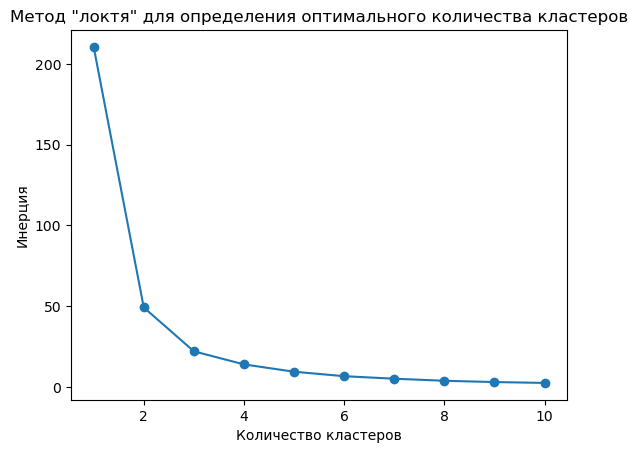

In [91]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

fd = fd.reshape(-1, 1)

# Список для сохранения значений инерции
inertia = []

# перебираю разное количество кластеров
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(fd)
    inertia.append(kmeans.inertia_)

# Построил график зависимости инерции от количества кластеров
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.title('Метод "локтя" для определения оптимального количества кластеров')
plt.show()


In [92]:
num_eyes = 2
num_clusters = 2

In [93]:
from sklearn.cluster import KMeans

# Создаю экземпляр K-Means с определенным количеством кластеров (глаз)
kmeans = KMeans(n_clusters=num_eyes)

# Применяю K-Means к признакам (fd - HOG-дескрипторы)
kmeans.fit(fd)

# Получаю метки кластеров для каждой точки
labels = kmeans.labels_

C:\Users\malex\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


C:\Users\malex\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


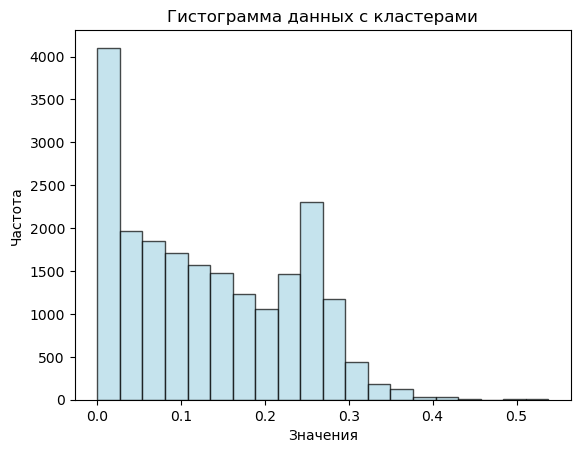

In [94]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Создаю экземпляр K-Means
kmeans = KMeans(n_clusters=num_clusters)

# Применяю K-Means к данным
kmeans.fit(fd.reshape(-1, 1))  # Используйте reshape для преобразования в двумерный массив

# Получаю метки кластеров для каждой точки данных
labels = kmeans.labels_

# Визуализация с использованием гистограммы
plt.hist(fd, bins=20, color='lightblue', edgecolor='black', alpha=0.7)
plt.title('Гистограмма данных с кластерами')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.show()


In [95]:
from sklearn.decomposition import PCA

# Узнаю количество образцов и признаков в массиве fd
n_samples, n_features = fd.shape

# Установливаю n_components равным минимуму между n_samples и n_features
n_components = min(n_samples, n_features)

# Создаю экземпляр PCA
pca = PCA(n_components=n_components)

# Преобразую извлеченные признаки (fd)
data_pca = pca.fit_transform(fd)

# Далее выполняю иерархическую кластеризацию на data_pca


In [96]:
fd

array([[0.24744216],
       [0.06778714],
       [0.02858157],
       ...,
       [0.14365205],
       [0.03008591],
       [0.        ]], dtype=float32)

In [97]:
len(fd)

20736

In [98]:
n_samples, n_features = fd.shape
print("Number of samples:", n_samples)
print("Number of features:", n_features)

Number of samples: 20736
Number of features: 1


In [99]:
print("Compute structured hierarchical clustering...")

st = time.time()
n_clusters = 10

ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward',
                               connectivity=connectivity)

# Преобразование X в двумерный массив
X_2d = X.reshape(-1, 1)
ward.fit(X_2d)
label = np.reshape(ward.labels_, rescaled_eyes.shape)

print("Elapsed time: ", time.time() - st)
print("Number of pixels: ", label.size)
print("Number of clusters: ", np.unique(label).size)

Compute structured hierarchical clustering...
Elapsed time:  0.12914681434631348
Number of pixels:  1600
Number of clusters:  10


In [100]:
print("Compute structured hierarchical clustering...")

st = time.time()
n_clusters = 10

ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward',
                               connectivity=connectivity)

# Преобразование X в двумерный массив
X_res = X.reshape(-1, 1)
ward.fit(X_res)
label = np.reshape(ward.labels_, rescaled_eyes.shape)

print("Elapsed time: ", time.time() - st)
print("Number of pixels: ", label.size)
print("Number of clusters: ", np.unique(label).size)

Compute structured hierarchical clustering...
Elapsed time:  0.10541677474975586
Number of pixels:  1600
Number of clusters:  10


In [101]:
from sklearn.decomposition import PCA

# Создаю экземпляр PCA с установкой правильного количества компонент
n_components = min(n_samples, n_features) 
pca = PCA(n_components=n_components)

# Применяю PCA к данным
reduced_data = pca.fit_transform(fd)

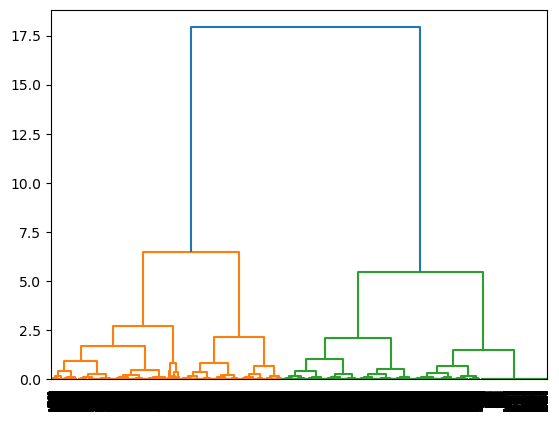

In [102]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Выполняю иерархическую кластеризацию на массиве признаков features
linked = linkage(reduced_data, method='ward')  # Метод 'ward' можно изменить на другой

# Строю дендрограмму для визуализации
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()

In [103]:
from sklearn.cluster import DBSCAN

# Создаю экземпляр DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Применяю DBSCAN к признакам
dbscan.fit(fd)

# Получаю метки кластеров
labels = dbscan.labels_


In [104]:
label.shape

(40, 40)

In [105]:
label2 = label.reshape(40,40)

In [106]:
label2.shape

(40, 40)

In [107]:
#отображение картинки по названию
def show_img_by_path(display_list):
    plt.figure(figsize=(5, 5))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        img_path = path+'/'+display_list[i]+'.png'
        image = plt.imread(img_path)

        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(image)
        plt.axis('off')
    plt.show()

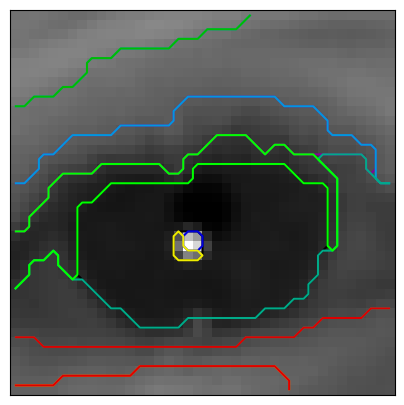

In [108]:
# Отображаю результаты на картинке
plt.figure(figsize=(5, 5))
plt.imshow(rescaled_eyes, cmap=plt.cm.gray)

for l in range(n_clusters):
    plt.contour(label2 == l,
                colors=[plt.cm.nipy_spectral(l / float(n_clusters)), ])
    
plt.xticks(())
plt.yticks(())
plt.show()

In [109]:
# путь
path = r'1_Left_4.png'
pathm = r'1_Left_4_m.jpg'

# Считывание изображения
image1 = cv2.imread(path)
mask = cv2.imread(pathm)

# отображение имени 
window_name = 'image'

In [110]:
# преобразование изображения в массив пикселей
img_data = image1.reshape((-1, 3))
img_data = np.float32(img_data)

# Определение количества кластеров
k = 4

# Создание объекта KMeans и обучение модели
kmeans = KMeans(n_clusters=k)
kmeans.fit(image1.reshape(-1, 3))

# Получение меток кластеров для каждого пикселя
labels = kmeans.labels_

# Преобразование массива меток обратно в изображение
segmented_image = labels.reshape(image1.shape[:2])

C:\Users\malex\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [111]:
image1

array([[[91, 91, 91],
        [92, 92, 92],
        [93, 93, 93],
        ...,
        [92, 92, 92],
        [91, 91, 91],
        [91, 91, 91]],

       [[91, 91, 91],
        [92, 92, 92],
        [94, 94, 94],
        ...,
        [94, 94, 94],
        [92, 92, 92],
        [91, 91, 91]],

       [[92, 92, 92],
        [93, 93, 93],
        [95, 95, 95],
        ...,
        [96, 96, 96],
        [93, 93, 93],
        [92, 92, 92]],

       ...,

       [[83, 83, 83],
        [83, 83, 83],
        [83, 83, 83],
        ...,
        [70, 70, 70],
        [71, 71, 71],
        [72, 72, 72]],

       [[84, 84, 84],
        [85, 85, 85],
        [85, 85, 85],
        ...,
        [71, 71, 71],
        [72, 72, 72],
        [73, 73, 73]],

       [[85, 85, 85],
        [85, 85, 85],
        [86, 86, 86],
        ...,
        [71, 71, 71],
        [72, 72, 72],
        [73, 73, 73]]], dtype=uint8)

In [112]:
labels.shape

(40000,)

In [113]:
label2 = labels.reshape(40000, 1)
label2.shape

(40000, 1)

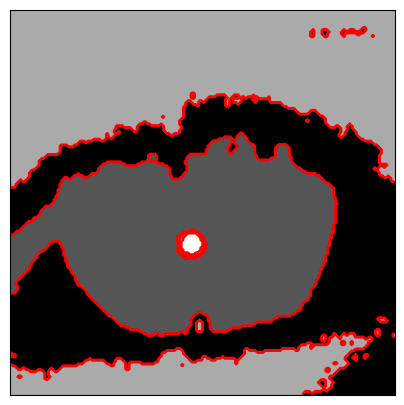

In [114]:
# отображение результатов на картинке

plt.figure(figsize=(5, 5))

plt.imshow(segmented_image, cmap=plt.cm.gray)
plt.contour(segmented_image, colors='r', linewidths=1)

plt.xticks(())
plt.yticks(())
plt.show()